# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [1]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from tqdm import tqdm

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [4]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
  return keras.utils.to_categorical(y)

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [5]:
#code here
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [15]:
# evaluate a model using test as val
def evaluate_model(dataX, dataY, noise=0):
  # define model
  model = define_model()
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[:50000], dataY[:50000], dataX[50000:], dataY[50000:]
  trainY = randomize(trainY, amount=noise)
  # es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
  # fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print(model.summary())
  print('> %.3f' % (acc * 100.0))
  # stores scores
  return acc, history

In [16]:
score, history = evaluate_model(x_train, y_train)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.1542 - accuracy: 0.9518 - val_loss: 0.0624 - val_accuracy: 0.9821
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0459 - val_accuracy: 0.9855
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0502 - val_accuracy: 0.9841
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0400 - val_accuracy: 0.9885
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0352 - val_accuracy: 0.9906
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0347 - val_accuracy: 0.9908
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0377 -

In [8]:
def plot_acc_loss(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


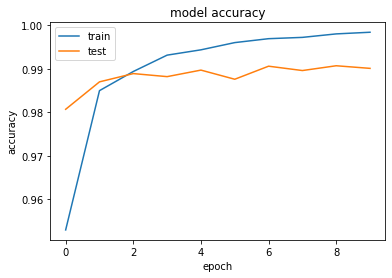

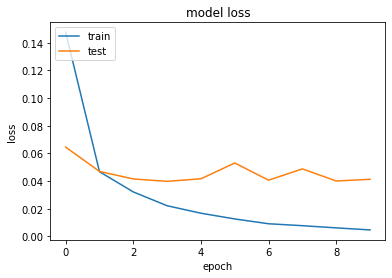

In [ ]:
plot_acc_loss(history)

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [9]:
import random
def randomize(y_train, amount=20):
  y_train_random = np.array(y_train)
  for idx, val in enumerate(y_train_random):
    r = random.random()
    if r < amount:
      y_train_random[idx][:] = 0
      y_train_random[idx][random.randint(0,9)] = 1
  return y_train_random

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3061 - accuracy: 0.1002 - val_loss: 2.3031 - val_accuracy: 0.1130
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 2.3034 - accuracy: 0.0992 - val_loss: 2.3060 - val_accuracy: 0.0996
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3034 - accuracy: 0.1027 - val_loss: 2.3051 - val_accuracy: 0.1114
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3031 - accuracy: 0.1030 - val_loss: 2.3042 - val_accuracy: 0.0908
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3028 - accuracy: 0.1034 - val_loss: 2.3042 - val_accuracy: 0.0822
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 2.3025 - accuracy: 0.1048 - val_loss: 2.3076 - val_accuracy: 0.0511
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 2.3020 - accuracy: 0.1076 - val_loss: 2.3074 -

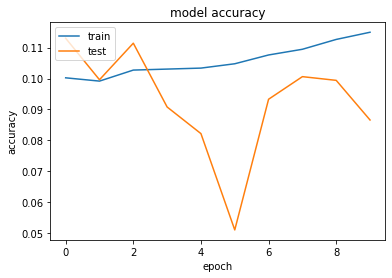

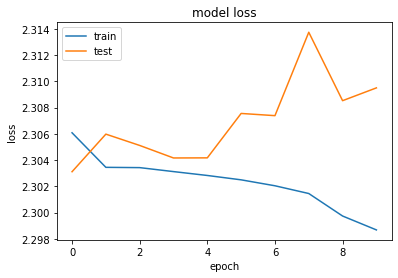

In [17]:
# Randomize 20% of train labels and repeat Q1 (1,2 & 3)
score, history = evaluate_model(x_train, y_train, noise=20)
plot_acc_loss(history)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1526 - accuracy: 0.9522 - val_loss: 0.0853 - val_accuracy: 0.9744
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0608 - val_accuracy: 0.9820
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.0437 - val_accuracy: 0.9884
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0360 - val_accuracy: 0.9894
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0390 - val_accuracy: 0.9903
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0411 - val_accuracy: 0.9907
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.0384 - val_accuracy:

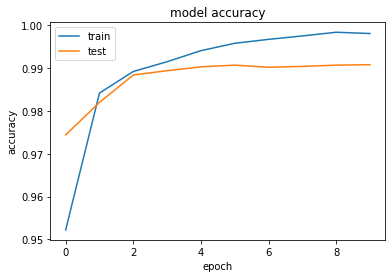

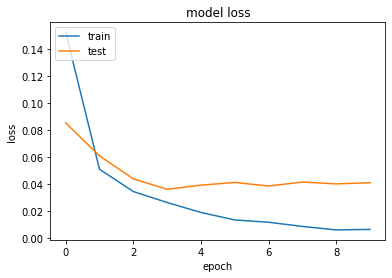

In [ ]:
# Randomize 40% of train labels and repeat Q1 (1,2 & 3)
score, history = evaluate_model(x_train, y_train, noise=40)
plot_acc_loss(history)

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1609 - accuracy: 0.9496 - val_loss: 0.0656 - val_accuracy: 0.9804
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0556 - val_accuracy: 0.9836
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0335 - accuracy: 0.9892 - val_loss: 0.0500 - val_accuracy: 0.9858
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0368 - val_accuracy: 0.9899
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0445 - val_accuracy: 0.9879
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.0381 - val_accuracy: 0.9907
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0476 - val_accuracy:

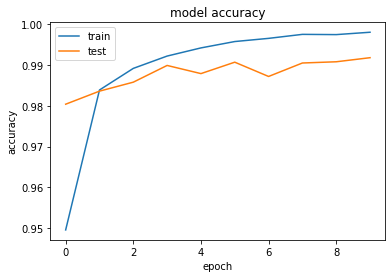

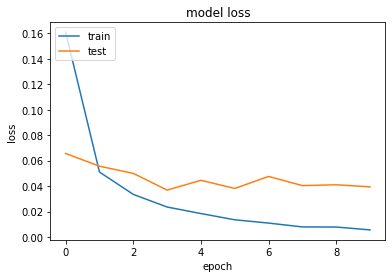

In [ ]:
# Randomize 60% of train labels and repeat Q1 (1,2 & 3)
score, history = evaluate_model(x_train, y_train, noise=60)
plot_acc_loss(history)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1536 - accuracy: 0.9523 - val_loss: 0.0612 - val_accuracy: 0.9816
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0530 - accuracy: 0.9838 - val_loss: 0.0474 - val_accuracy: 0.9862
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0433 - val_accuracy: 0.9877
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0429 - val_accuracy: 0.9877
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0349 - val_accuracy: 0.9901
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0427 - val_accuracy: 0.9890
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0464 - val_accuracy:

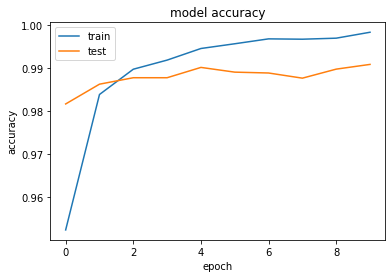

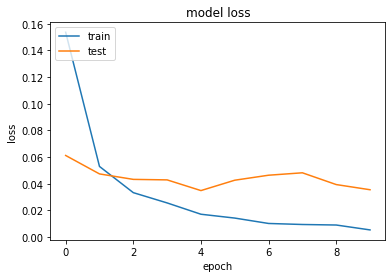

In [ ]:
# Randomize 80% of train labels and repeat Q1 (1,2 & 3)
score, history = evaluate_model(x_train, y_train, noise=80)
plot_acc_loss(history)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1550 - accuracy: 0.9516 - val_loss: 0.0610 - val_accuracy: 0.9813
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0400 - val_accuracy: 0.9884
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0454 - val_accuracy: 0.9882
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.0431 - val_accuracy: 0.9889
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0400 - val_accuracy: 0.9897
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0440 - val_accuracy: 0.9891
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0404 - val_accuracy:

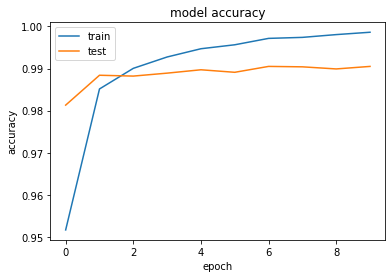

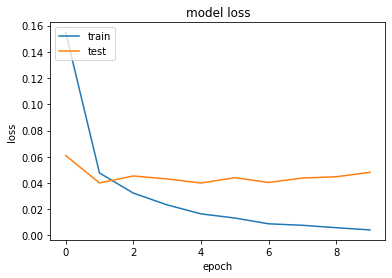

In [ ]:
# Randomize 100% of train labels and repeat Q1 (1,2 & 3)
score, history = evaluate_model(x_train, y_train, noise=100)
plot_acc_loss(history)